In [1]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
def drawVenn2(A,B,labels = ('A', 'B')):
    '''
    listing elements in Venn diagram of two sets
    '''
    v2=venn2([A,B],set_labels = labels);
    v2.get_label_by_id('01').set_text(', '.join(map(str,B-A)))
    v2.get_label_by_id('10').set_text(', '.join(map(str,A-B)))
    if A&B:
        v2.get_label_by_id('11').set_text(', '.join(map(str,A&B)))

In [3]:
def drawVenn3(A,B,C,labels = ('A', 'B', 'C')):
    '''
    listing elements in Venn diagram of three sets, A, B, C
    '''
    v3=venn3([A,B,C],set_labels = labels);
    if A-B-C:
        v3.get_label_by_id('100').set_text('\n'.join(map(str,A-B-C)))
        v3.get_patch_by_id('100').set_alpha(0.6)
        v3.get_patch_by_id('100').set_facecolor('Yellow')
    if A&B-C:
        v3.get_label_by_id('110').set_text('\n'.join(map(str,A&B-C)))
        v3.get_patch_by_id('110').set_alpha(0.3)
        v3.get_patch_by_id('110').set_facecolor('Red')
    if B-C-A:
        v3.get_label_by_id('010').set_text('\n'.join(map(str,B-C-A)))
        v3.get_patch_by_id('010').set_alpha(0.6)
        v3.get_patch_by_id('010').set_facecolor('Magenta')
    if A&C-B:
        v3.get_label_by_id('101').set_text('\n'.join(map(str,A&C-B)))
        v3.get_patch_by_id('101').set_alpha(0.3)
        v3.get_patch_by_id('101').set_facecolor('Green')
    if A&B&C:
        v3.get_label_by_id('111').set_text('\n'.join(map(str,A&B&C)))
        v3.get_patch_by_id('111').set_alpha(0.1)
        v3.get_patch_by_id('111').set_facecolor('Black')
    if B&C-A:
        v3.get_label_by_id('011').set_text('\n'.join(map(str,B&C-A)))
        v3.get_patch_by_id('011').set_alpha(0.3)
        v3.get_patch_by_id('011').set_facecolor('Blue')
    if C-B-A:
        v3.get_label_by_id('001').set_text('\n'.join(map(str,C-B-A)))
        v3.get_patch_by_id('001').set_alpha(0.6)
        v3.get_patch_by_id('001').set_facecolor('Cyan')

# 1. PROVING IDENTITIES
--- 
#### Given: A and B are sets, $\exists$ x such that (x $\in$ A $\land$ x $\in$ B)

##### 1.  $A \setminus B = A \cap B^c$
**Direct Proof by Double Inclusion**
- Assume x $\in$ A \ B
- \(x $\in$ A $\setminus$ B $\Rightarrow$ x $\in$ A\) and \(x $\notin$ B\)
- \(x $\in A \cap B^c$\)
  
- \(y $\in A \cap B^c \Rightarrow y \in$ A\) and \(y $\notin$ B\)
- \(y $\in A \setminus$ B\)
- Thus, A\B $\subseteq$ A $\cap$ $B^C$ or A\B = A $\cap$ $B^C$

#### 2.  B = (B $\cap$ A) $\cup$ (B $\cap$ $A^{c}$)
**Proof by Direct Inclusion**
- $x \in B$
- $x \in B \cap A$ or $x \in B \cap A^c$
- $y \in (B \cap A) \cup (B \cap A^c)$
- $y \in B$ and $y \in A$ or $y \in B$ and $y \in A^c$
- Thus, $B = (B \cap A) \cup (B \cap A^c)$


#### 3.  B\A = B $\cap$ $A^{c}$
**Direct Proof**
- Let $x$ be an element in both $A$ and $B$ ($x \in A \land x \in B$)
- $x \in B$ and $x \notin A$
- $x \in B$ and $x \in A^c$
- $x \in B \cap A^c$, which means $x \in B \setminus A$
- $x \in B \setminus A$, then $x \in B$ and $x \notin A$
- $x \in B \cap A^c$
- Thus, $B \setminus A = B \cap A^c$


#### 4.  A $\cup$ B = A $\cup$ (B $\cap$ $A^{c}$)
**Direct Proof**
- Let $x$ be an element in both $A$ and $B$
- This means $x \in A \cap B$
- By the distributive law: $A \cup (B \cap A^c) = (A \cup B) \cap (A \cup A^c)$
- But $A \cup A^c = U$
- Thus, $A \cup (B \cap A^c) = (A \cup B) \cap U$
- So, $A \cup (B \cap A^c) = A \cup B$


#### 5.  $(\textbf{U}_{i=1}^{\infty} A_{i}^{c})^{c}$ = $\cap_{i=1}^{\infty}A_{i}$
**Direct Proof and Reverse Inclusion**
- Let $x$ be an element such that $x \in A_i$ for some $i$
- By De Morgan's law, $x \notin (\bigcup_{i=1}^{\infty} A_{i}^{c})$
- Therefore, $x$ belongs to the intersection of $A_i$ for that $i$
- Since this holds for any such $x$, we have $\cap_{i=1}^{\infty}A_{i} \subseteq (\bigcup_{i=1}^{\infty} A_{i}^{c})^{c}$

Now, for the reverse inclusion:

- Assume $y \in (\bigcup_{i=1}^{\infty} A_{i}^{c})^{c}$
- By De Morgan's law, $y \notin \bigcup_{i=1}^{\infty} A_{i}^{c}$
- This means $y \notin A_i^{c}$ for any $i$
- Therefore, $y$ belongs to each $A_i$
- Hence, $(\bigcup_{i=1}^{\infty} A_{i}^{c})^{c} \subseteq \cap_{i=1}^{\infty}A_{i}$

- Conclusion, combining both inclusions, $(\bigcup_{i=1}^{\infty} A_{i}^{c})^{c} = \cap_{i=1}^{\infty}A_{i}$


#### 6.  |A $\cup$ B| = |A| + |B| - |A $\cap$ B|
**Direct Proof using the Inclusion-Exclusion Principle**
- Let $A$ and $B$ be sets
- Assume $\exists x$ such that $x \in A$ and $x \in B$

Using the Inclusion-Exclusion Principle:
- |A $\cup B| = |A| + |B| - |A \cap$ B|


# 2. Sets and  Subsets
---

#### If A = {2,3,4,5}, and B = {$x \in \mathbb{N} | x \ is \ even$}. Is A $\subset$ B?

Consider each element of $A$:
- 2 is even, so $2 \in B$
- 3 is not even, so $\notin$ $B$
- 4 is even, so $4 \in B$
- 5 is not even, so $\notin$ $B$

A is not a proper subset of B.


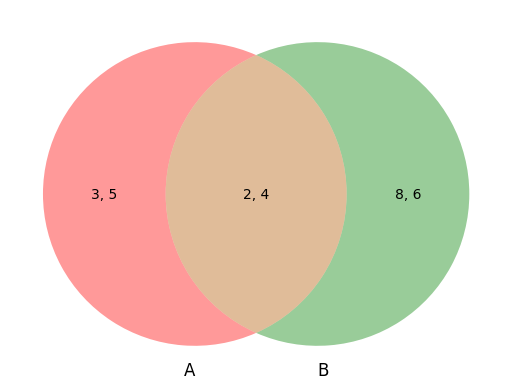

In [5]:
A = {2,3,4,5}
B = {2,4,6,8} 

if A.issubset(B) and A != B:
    print("A is a proper subset of B.")
else:
    print("A is not a proper subset of B.")

drawVenn2(A, B,labels=('A', 'B'))

**Conclusion: Since not every element in $A$ is also in $B$, $A$ is $\not\subset$ of $B$**

## Let sets:
$\textbf{A} = \{x|x \in \mathbb{Z}, 0 \leq x \leq 9\}$ \
$\textbf{B}$ = {2,4,6,8\} \
$\textbf{C}$ = {1,3,5,7,9\} \
$\textbf{D}$ = {3,4,5\} 

Find a set $\textbf{X}$ which will satisfy the following conditions: \
    1. $\textbf{X} \ and \ \textbf{B}$ are disjoint. \
    2. $\textbf{X} \subseteq \textbf{D}$ but $\textbf{X} \nsubseteq \textbf{B}$. \
    3. $\textbf{X} \subseteq \textbf{A}$ but $\textbf{X} \not\subset \textbf{C}$.



1. $\mathbf{X}$ and $\mathbf{B}$ are disjoint: \
Define $\mathbf{X}$ as the set of numbers between 0 and 9, excluding those in $\mathbf{B}$. \
$(\textbf{X} = \{x | x \in \mathbb{Z}, 0 \leq x \leq 9\} \setminus$ {2, 4, 6, 8}). \
**Thus, $\mathbf{X}$ = {0, 1, 3, 5 , 7, 9}**

- $\mathbf{X} \subseteq \mathbf{D}$ but $\mathbf{X} \nsubseteq \mathbf{B}$: \
$\mathbf{D} = {3, 4, 5}$.
So, $\mathbf{X}$ = ${3,4,5}$. But $\textbf{X} \nsubseteq \textbf{B}$. $\textbf{B}$ = ${2,4,6,8}$. \
$\textbf{X}$ = {3,4,5} \ {2, 4, 6, 8}. \
**Thus, $\mathbf{X}$ = {3, 5}**

- $\mathbf{X} \subseteq \mathbf{A}$ but $\mathbf{X} \not\subset \mathbf{C}$: \
$\mathbf{A}$ = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}. \
$\mathbf{C}$ = {1, 3, 5, 7, 9}. \
$\textbf{X}$ = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} \ {1, 3, 5, 7, 9}. \
**Thus, $\mathbf{X}$ = {0, 2, 4, 6, 8}**

**A set $\textbf{X}$ which will satisfy all the conditions is not possible.**

# 3. Set Operations
---

1. First solve the problems manually, use Latex programming to show your manual solutions.
2. Second, solve the problem using python. Show your codes for the pythonic solutions.
Hint: You know your solutions is right if your manual solution is equivalent to your pythonic solution.

#### Given:
- $\textbf{U}$ = {1,2,3,4,5\},
$\textbf{A}$ = {1,2,3,4,5\},
$\textbf{B}$ = {4,5,6,7\},
$\textbf{C}$ = {5,6,7,8,9\},
$\textbf{D}$ = {1,3,5,7,9\},
$\textbf{E}$ = {2,4,6,8\}, 
$\textbf{F}$ = {1,5,9\}

- $\textbf{C} \oplus \textbf{D}$
- $\textbf{A} \backslash \textbf{B}$
- $\textbf{B} \backslash \textbf{A}$
- $\textbf{E} \oplus \textbf{F}$


#### Manual Solution:
$\mathbf{C} \oplus \mathbf{D}$ \
$= (\{5,6,7,8,9\} \cup \{1,3,5,7,9\}) \setminus (\{5,6,7,8,9\} \cap \{1,3,5,7,9\})$ \
$= \{1,3,5,6,7,8,9\} \setminus \{5,7,9\}$ \
$= \{1,3,5,6,7,8,9\} \setminus \{5,7,9\}$ \
$= \{1,3,6,8\}$

$A \backslash B $ \
$= A - B$ \
$= \{1,2,3,4,5\} - \{4,5,6,7\}$ \
$ = \{1,2,3\}$

$B \backslash A $\
$= B - A$ \
$= \{4,5,6,7\} - \{1,2,3,4,5\}$ \
$ = \{6,7\}$

$E \oplus F $\
$= (E \cup F) \setminus (E \cap F)$ \
$= (\{2,4,6,8\} \cup \{1,5,9\}) \setminus (\{2,4,6,8\} \cap \{1,5,9\})$ \
$= \{1,2,4,5,6,8,9\} \setminus \{\}$ \
$= \{1,2,4,5,6,8,9\}$

#### Pythonic Solution:

In [7]:
U = {1,2,3,4,5}
A = {1,2,3,4,5}
B = {4,5,6,7}
C = {5,6,7,8,9}
D = {1,3,5,7,9}
E = {2,4,6,8}
F = {1,5,9}

CD = C.symmetric_difference(D)
print("C ⊕ D =", CD)

AB = A.difference(B)
print("A \\ B =", AB)

BA = B.difference(A)
print("B \\ A =", BA)

EF = E.symmetric_difference(F)
print("E ⊕ F =", EF)

C ⊕ D = {1, 3, 6, 8}
A \ B = {1, 2, 3}
B \ A = {6, 7}
E ⊕ F = {1, 2, 4, 5, 6, 8, 9}


# 4. Finite Sets and The Counting Principles
---

#### In a Survey of 120 People, it was found that:

- 65 read Newsweek Magazine
- 45 read Times Magazine
- 42 read Fortune Magazine
- 20 read Both Newsweek and Time
- 25 read both Newsweek and Fortune
- 15 read both Time and Fortune
- 8 read all three magazines

#### With these information do the following:

1. Draw the venn diagram using python.
2. Find the number of people who read at **"least one"** of the three magazines.
3. Find the number of people who read exactly one magazine.


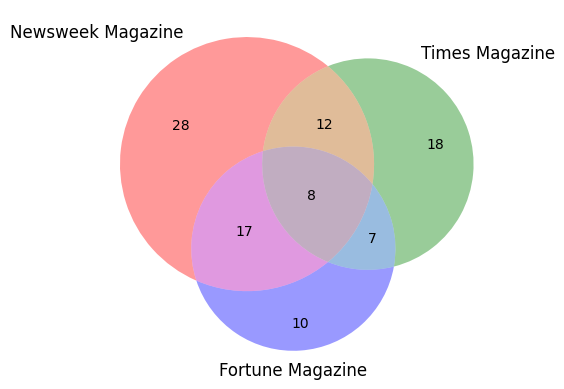

In [8]:
News = 28
Times = 18
Fortune = 10
NewsFortune = 17 
NewsTimes = 12
TimesFortune = 7 
NewsTimesFortune = 8

venn3(subsets=(News, Times, NewsTimes, Fortune, NewsFortune, TimesFortune, NewsTimesFortune), set_labels=('Newsweek Magazine', 'Times Magazine', 'Fortune Magazine'))

plt.show()

In [9]:
news = 65 - (20 + 25 - 8)
times = 45 - (20 + 15 - 8)
fortune = 42 - (25 + 15 - 8)
newstimes = 20 - 8
newsfortune = 25 - 8
timesfortune = 15 - 8
newstimesfortune = 8

# Number of people who read at least one of the three magazines
X = 65 + 45 + 42 - 25 - 20 - 15 + 8

# The total number of people who have read exactly one magazine
fortune_readers = 42 - 25 - 15 + 8
newsweek_readers = 65 - 25 - 20 + 8
times_readers = 45 - 15 -20 + 8
Y = fortune_readers + newsweek_readers + times_readers

print("Number of people who read at least one of the 3 magazines:", X)
print("Total number of people who read at exactly one magazine:", Y)

Number of people who read at least one of the 3 magazines: 100
Total number of people who read at exactly one magazine: 56


#### In a survey of 25 new cars being sold at a local auto dealer was conducted to see which of the three popular options: **air-conditioning, denoted as A**; **radio, denoted as R**; and **power windows, denoted as W** were installed. 

The survey found that: 
- 15 had A. 
- 12 had R. 
- 11 had W. 
- 5 had A and W. 
- 9 had A and R. 
- 4 had R and W. 
- Only 3 have the three options. 

With these information do the following:

1. Draw the venn diagram using python.
2. Find the number of cars with W only.
3. Find the number of cars with A only.
4. Find the number of cars with R only.
5. Find the number of cars with both R and W but not A.
6. Find the number of cars with both A and R but not W.
7. Find the number of cars with only one of the options.
8. Find the number of cars with at least one option.
9. Find the number of cars with none of the Options.

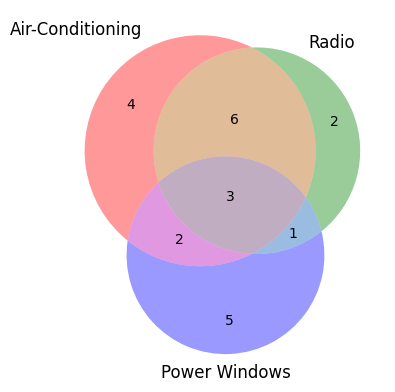

In [10]:
A = 15
R = 12
W = 11
AW = 5
AR = 9
RW = 4
ARW = 3

venn = venn3(subsets=(A - AR - AW + ARW, R - AR - RW + ARW, AR - ARW, W - AW - RW + ARW, AW - ARW, RW - ARW, ARW),
             
set_labels=('Air-Conditioning', 'Radio', 'Power Windows'))

In [11]:
T = 25
A = 15
R = 12
W = 11
AW = 5
AR = 9
RW = 4
ARW = 3

Wonly = W - AW - RW + ARW
Aonly = A - AW - AR + ARW
Ronly = R - AR - RW + ARW
R_and_W_not_A = RW - ARW
A_and_R_not_W = AR - ARW
one_option_only = Aonly + Ronly + Wonly
at_least_one_option = 15 + 11 + 12 - 5 - 9 - 4 + 3
none_of_the_options = T - (15 + 11 + 12 - 5 - 9 - 4 + 3)

print(f"Number of cars with W only: {Wonly}")
print(f"Number of cars with A only: {Aonly}")
print(f"Number of cars with R only: {Ronly}")
print(f"Number of cars with both R and W but not A: {R_and_W_not_A}")
print(f"Number of cars with both A and R but not W: {A_and_R_not_W}")
print(f"Number of cars with only one of the options: {one_option_only}")
print(f"Number of cars with at least one option: {at_least_one_option}")
print(f"Number of cars with none of the options: {none_of_the_options}")

Number of cars with W only: 5
Number of cars with A only: 4
Number of cars with R only: 2
Number of cars with both R and W but not A: 1
Number of cars with both A and R but not W: 6
Number of cars with only one of the options: 11
Number of cars with at least one option: 23
Number of cars with none of the options: 2
